In [1]:
import scipy as sp
import numpy as np
import scipy.linalg as sla
import scipy.sparse as sps
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# PCA

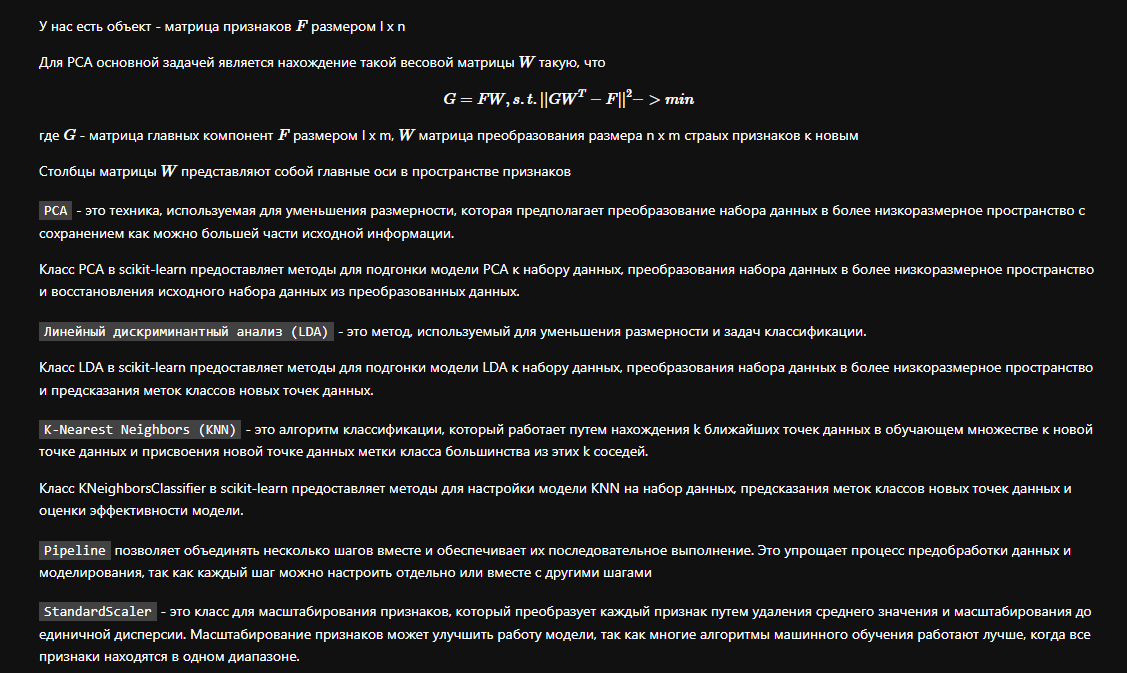

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
random_state = 0

# Загрузить набор данных Digits
X, y = datasets.load_digits(return_X_y=True)

# Разделить на train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

Здесь мы будем изучать что-то вроде набора данных mnist — изображения чисел от 0 до 9. каждое из которых имеет размер 8x8 пикселей.

In [3]:
X.shape, y.shape

((1797, 64), (1797,))

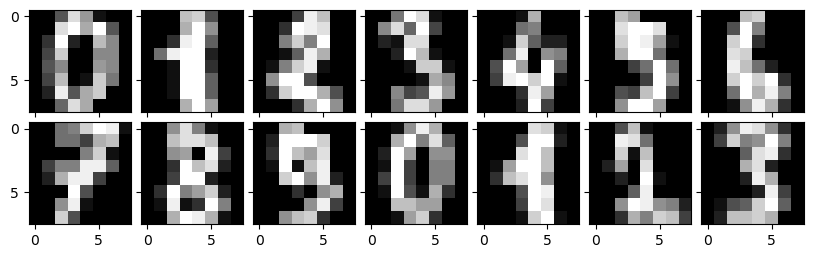

In [4]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))  # создает фигуру номер 1 размером 10 на 10
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,7),
                 axes_pad=0.1,
                 )
for i in range(14): # делает 14 картинок
    image = X[i,:].squeeze().reshape(8,8)
    # вызывается метод `imshow()` `i`-го подграфика в объекте `grid`, который 
    # отображает изображение, используя градацию серого цвета без интерполяции.
    grid[i].imshow(image,cmap='gray',interpolation='none')

Мы можем объединить всю предварительную обработку данных и алгоритм, который мы хотим использовать, с помощью инструмента sklearn make_pipeline. Это очень удобно, когда вы хотите написать более удобный для сопровождения код, и его будет легко проверить на наличие ошибок и внести изменения.

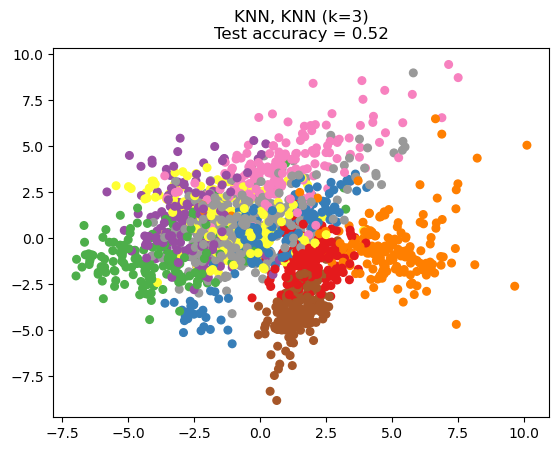

In [6]:
dim = len(X[0]) # количество признаков в наборе данных X
n_classes = len(np.unique(y))  # количество уникальных меток классов в наборе данных y

n_neighbors = 3 # устанавливаем количество ближайших соседей для knn
n_components = 2  # устанавливаем количество главных компонент, которые нужно 
                 # сохранить после уменьшения размерности с помощью PCA

# Уменьшите размерность до 2 с помощью PCA


knn_pca = make_pipeline(StandardScaler(),
                    PCA(n_components=n_components, random_state=1543),
                    KNeighborsClassifier(n_neighbors=n_neighbors))

# # Обучить модели метода
knn_pca.fit(X_train, y_train)
acc_knn = knn_pca.score(X_test, y_test) # вычисляет точность обученного классификатора на тестовой выборке

# Вставьте набор данных в 2 измерения, используя подогнанную модель
X_transformed = knn_pca[:-1].transform(X)

# Нанесите прогнозируемые баллы и покажите оценочный балл
plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, s=30, cmap='Set1')
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format("KNN",
                                                          n_neighbors,
                                                          acc_knn))
plt.show()

In [7]:
def calculate_score(n_neighbors, n_components):
    ### В этой функции реализуйте установку трубопровода
    ### с заданным номером или соседями и компонентами PCA
    ### on the train data
    ### и оценивая его на тестовых данных.
    
    # Построить конвейер с заданными гиперпараметрами
    pipeline = Pipeline([('pca', PCA(n_components = n_components)),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))]) 
    
    # Fit the method's model
    pipeline.fit(X_train, y_train)

    ### Верните результат теста
    score = pipeline.score(X_test, y_test)
    return score

построить зависимость оценки от n_neigbours и n_components

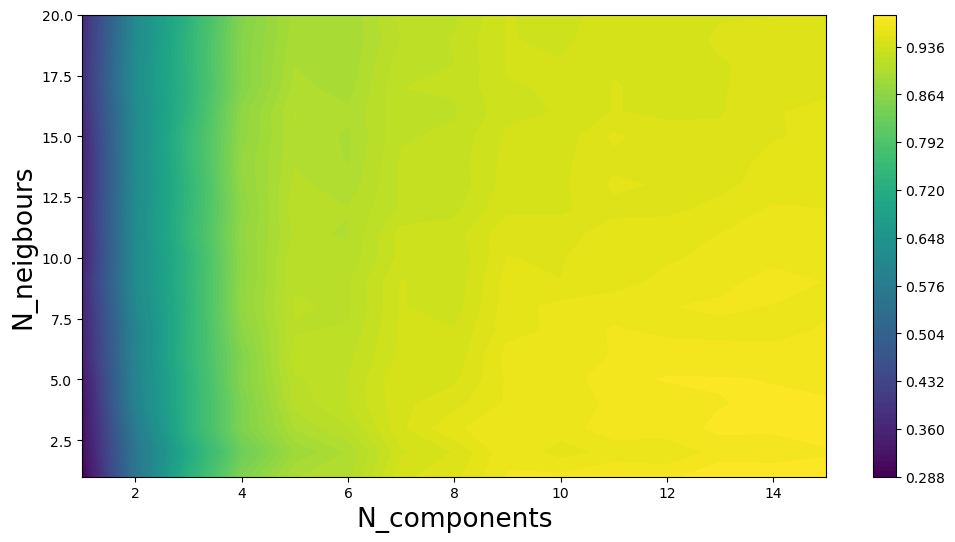

In [8]:
results = []

neighbors = range(1, 21)
components = range(1, 16)

for n_n in neighbors:
    for n_c in components:
        results.append(calculate_score(n_n, n_c))

x_pos, y_pos = np.meshgrid(components, neighbors)
plt.figure(figsize=(12,6))
# создаем график контуров
# x_pos и y_pos - массивы координат точек на плоскости
# np.array(results).reshape(x_pos.shape) - изменение формы results на форму
# массива x_pos
# levels = 100 - количество уровней, на которые разбивается диапазон значений 
# функции для визуализации на графике
plt.contourf(x_pos, y_pos, np.array(results).reshape(x_pos.shape), levels=100);
plt.colorbar()
plt.xlabel("N_components",fontsize=19)
plt.ylabel("N_neigbours",fontsize=19);

Давайте возьмем еще один набор данных о винах и посмотрим на эффект стандартизации данных.

In [9]:
from sklearn.datasets import load_wine

RANDOM_STATE = 42 # сид
FIG_SIZE = (10, 7) # размер фигуры

# датафрейм, содержит в себе данные о вине, данные были взяты из 'data',
# названия столбцов из 'feature_names'
'''
если return_X_y = False, то функция load_wine вернет объект типа Bunch. 
Объект Bunch это словарь, содержащий данные и метки классов, а также 
метаданные о датасете. В этом случае мы можем получить данные и метки 
классов, обращаясь к соответствующим ключам словаря

если return_X_y = True, то функция load_wine вернет кортеж, содержащий массив
данных и метки классов. В этом случае мы можем получить данные и метки классов,
обращаясь к соответствующим элементам кортежа

return_X_y по умолчанию False
'''
features = pd.DataFrame(load_wine(return_X_y = False)['data'],
                        columns = load_wine(return_X_y = False)['feature_names'])

# target это массив, содержащий метки классов для каждого объекта в датасете.
# В данном случае, это три класса вина
target = load_wine(return_X_y = False)['target']
features.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
# Сделайте разделение обучающих и тестовых данных, используя 30% тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

Хорошо, теперь, когда вы знаете, как сделать конвейер, сделайте конвейер со стандартным масштабатором и PCA и просто PCA.

In [11]:
# Подгонка к данным и прогнозирование с использованием конвейерного PCA.
unscaled_clf = Pipeline([('pca', PCA(n_components = 2))])
unscaled_clf.fit(X_train, y_train)


# Подгонка к данным и прогнозирование с использованием конвейерного масштабирования, PCA.
std_clf = Pipeline([('standardscaler', StandardScaler()), ('pca', PCA(n_components = 2))])
std_clf.fit(X_train, y_train)

# Извлечь PCA из пайплайна
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


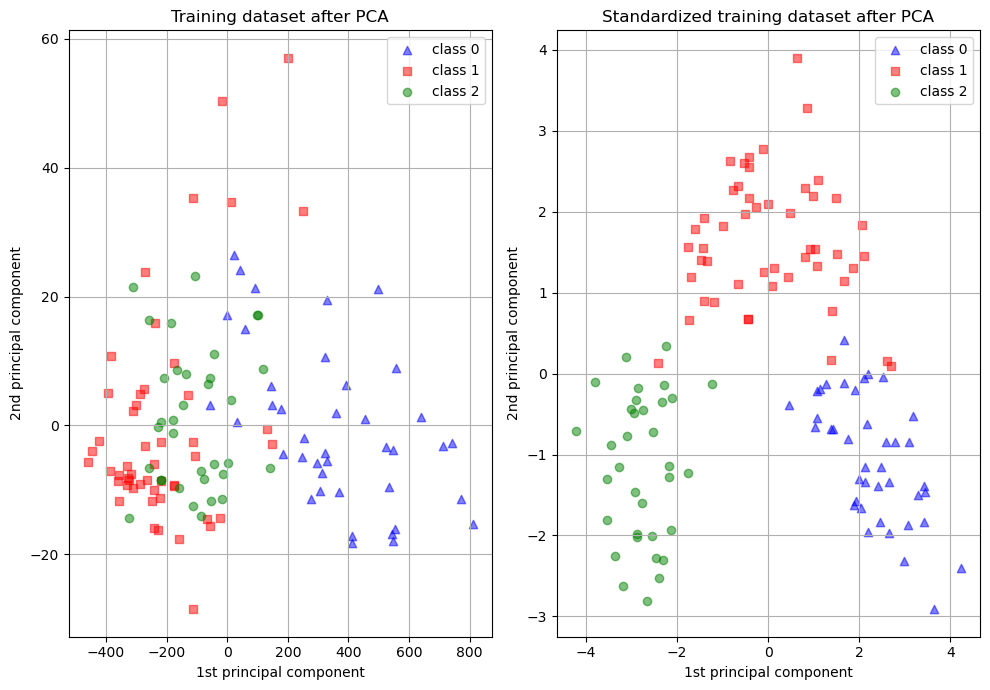

In [12]:
# Показать первые главные компоненты
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Используйте PCA без масштаба и с масштабом данных X_train для визуализации.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# визуализировать стандартизированный и нетронутый набор данных с выполненным PCA
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
     # В качестве координат точек используются значения первых двух главных 
    # компонент, рассчитанных с помощью метода transform() объекта PCA
    # Точки отображаются на графике с различными цветами, в зависимости от
    # значения y_train (метки классов), используя условие y_train == l
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

    # то же самое для второго графика, только со значениями рассчитанными
# со стандартизацией данных
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    # подписи осей
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right') # расположение legend
    ax.grid() # сетка

    # автоматически регулирует расстояния между подзаголовками и метками осей, 
# чтобы избежать наложения их друг на друга
plt.tight_layout()

plt.show()

## Постройте график зависимости объясненной дисперсии от числа компонентов. Для этого используйте доступные методы класса PCA.
Объясненная дисперсия (explained variance) - это мера того, насколько хорошо модель описывает данные. В контексте метода главных компонент (PCA), объясненная дисперсия отражает количество информации (дисперсии) в данных, которое может быть объяснено каждой главной компонентой.

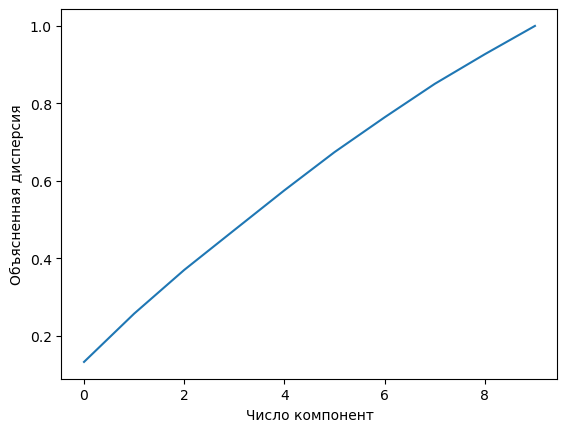

In [14]:
# Создаем случайные данные
X = np.random.rand(200, 10)

# Создаем объект PCA
pca = PCA()

# Применяем PCA к данным
pca.fit(X)

# Получаем объясненную дисперсию для каждого числа компонентов
# np.cumsum в библиотеке NumPy возвращает кумулятивную сумму элементов массива по заданной оси. 
# Например, если у нас есть массив [1, 2, 3, 4], то np.cumsum([1, 2, 3, 4]) вернет 
# массив [1, 3, 6, 10]
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Строим график
plt.plot(explained_variance)
plt.xlabel('Число компонент')
plt.ylabel('Объясненная дисперсия')
plt.show()

# SVD decomposition 

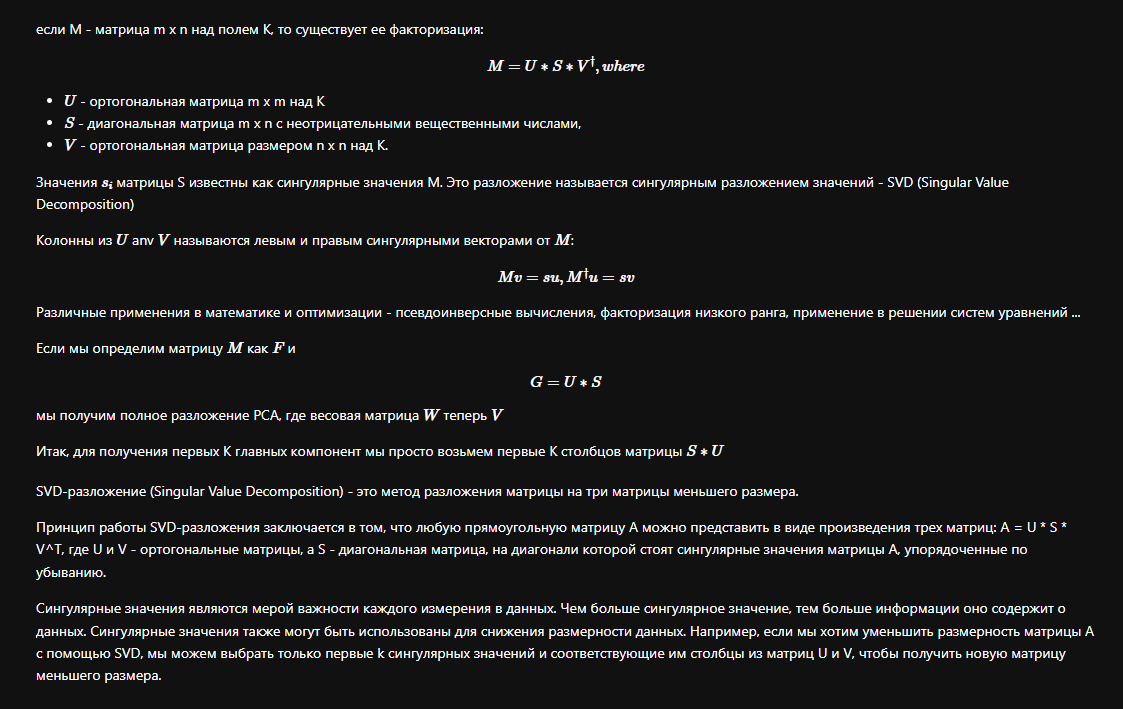
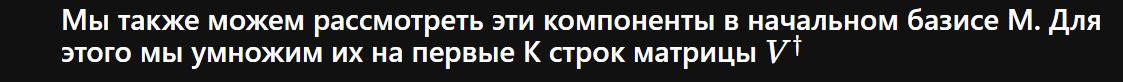

In [19]:
#!wget https://github.com/yandexdataschool/MLatImperial2020/raw/master/03_lab/swisscows_edit.jpg

In [34]:
from PIL import Image
from matplotlib.pyplot import imread
from skimage import color

# imread() используется для чтения изображения из файла
# color.rgb2gray() используется для преобразования цветного изображения в оттенки серого
img = color.rgb2gray(imread(r'swisscows_edit.jpg'))
img.shape

(600, 800)

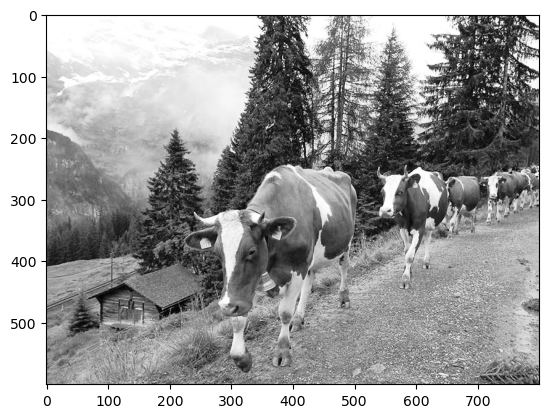

In [35]:
# plt.imshow() используется для отображения изображения
# cmap = 'greys_r' используется для установки цветовой карты на оттенки серого
imgplot = plt.imshow(img, cmap='Greys_r')

# PCA с использованием SVD для сжатия

Мы будем использовать svd из пакета scipy

In [36]:
# U и V_h являются ортогональными матрицами, а s - диагональной матрицей с сингулярными значениями
# в порядке убывания
# Параметр full_matrices=False указывает, что функция SVD должна возвращать только сингулярные 
# значения и матрицы U и V_h, не полные матрицы
U, s, V_h = sla.svd(img, full_matrices=False)
print(U.shape, s.shape, V_h.shape)

(600, 600) (600,) (600, 800)


In [37]:
# используем матрицы U, s и V_h, полученные в результате SVD разложения матрицы изображения,
# чтобы выбрать только первую главную компоненту
# Первая главная компонента может быть получена путем умножения первого столбца матрицы U 
# на первый элемент диагональной матрицы s, а затем на первую строку матрицы V_h
# [:, np.newaxis] и [np.newaxis, :] используются для того, чтобы привести одномерные массивы к
# двумерному виду, необходимому для выполнения матричного умножения
pca_1 = (U[:, 0] * s[0])[:, np.newaxis].dot(V_h[0, :][np.newaxis, :])

# pca_1 - это матрица, содержащая информацию только о первой главной компоненте
pca_1.shape

(600, 800)

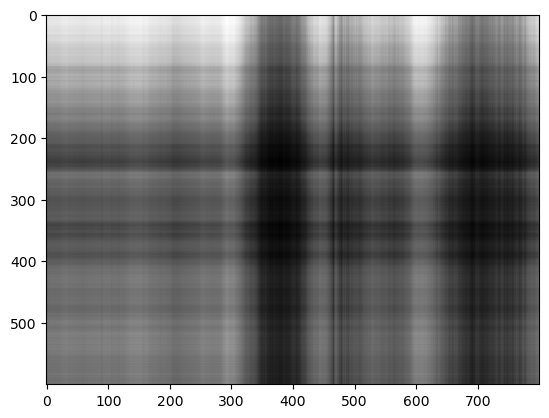

In [38]:
plt.imshow(pca_1, cmap='Greys_r');

## Теперь напишите функцию, которая будет возвращать ценовые компоненты от I-го до J-го в исходном базисе (Подсказка: посмотрите, как мы вычислили первую компоненту в исходном базисе)

In [39]:
U, s, V_h = sla.svd(img, full_matrices=False)
def PCA(start_component = 0, end_component = 1, U = U, s = s, V_h = V_h):
    # U[:, start_component : end_component] - это выборка из матрицы левых сингулярных векторов, 
    # которые являются главными компонентами. start_component : end_component - это диапазон индексов
    # компонент, который мы хотим использовать для проекции
    # s[start_component : end_component] - это выборка из сингулярных значений, соответствующих 
    # главным компонентам, которые мы выбрали в предыдущем шаге
    # V_h[start_component : end_component, :] - это выборка из транспонированной матрицы правых 
    # сингулярных векторов, которые также являются главными компонентами
    
    # умножив выбранные компоненты друг на друга, мы получаем матрицу, которая содержит информацию
    # только о выбранных главных компонентах
    # это позволяет производить анализ данных и извлекать информацию о наиболее важных признаках в данных
    US = (U[:, start_component : end_component] * s[start_component : end_component])\
    .dot(V_h[start_component : end_component, :])

    return US

In [40]:
pca_1 = PCA()
pca_1_20 = PCA(end_component=20)
pca_1_50 = PCA(end_component=50)
pca_20_100 = PCA(20, 100)
pca_20_end = PCA(20, 384)
pca_full = PCA(0, 384)

Text(0.5, 1.0, '20-end PCA')

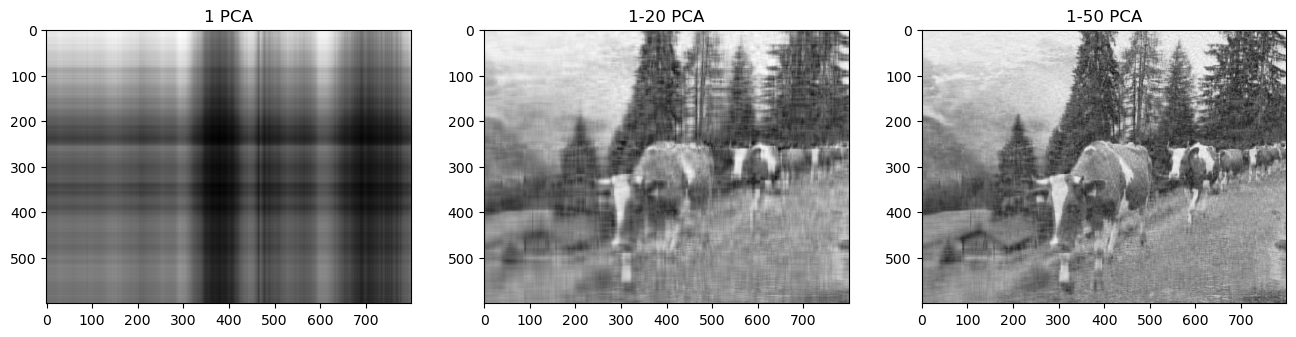

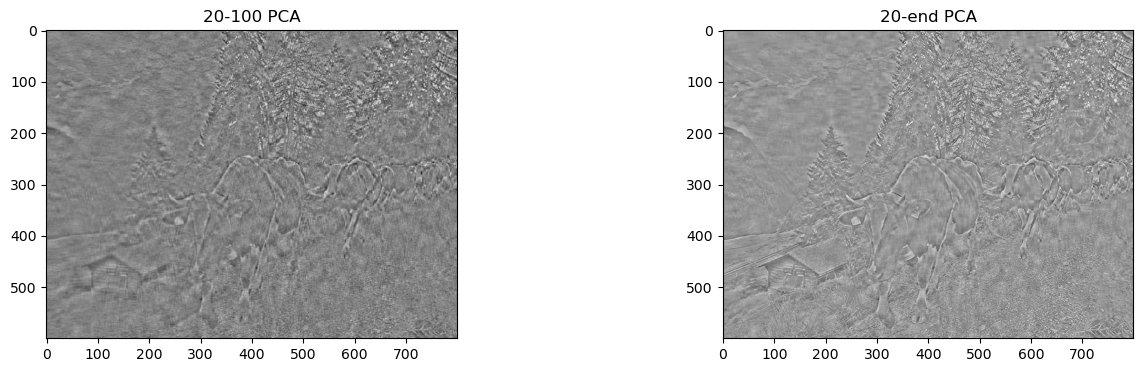

In [41]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
imgplot = plt.imshow(pca_1, cmap='Greys_r')
plt.title("1 PCA")

plt.subplot(1,3,2)
imgplot = plt.imshow(pca_1_20, cmap='Greys_r')
plt.title("1-20 PCA")

plt.subplot(1,3,3)
imgplot = plt.imshow(pca_1_50, cmap='Greys_r')
plt.title("1-50 PCA")

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
imgplot = plt.imshow(pca_20_100, cmap='Greys_r')
plt.title("20-100 PCA")

plt.subplot(1,2,2)
imgplot = plt.imshow(pca_20_end, cmap='Greys_r')
plt.title("20-end PCA")

Text(0.5, 1.0, '20-end PCA')

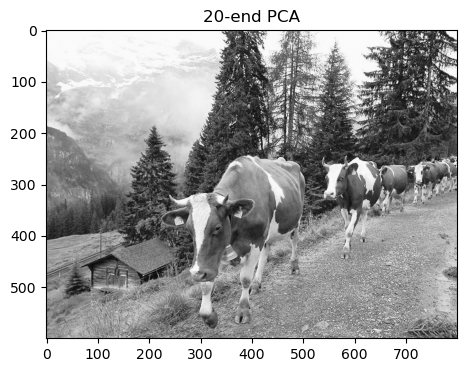

In [42]:
pca_full = PCA(0, 384)

plt.figure(figsize = (16, 4))
plt.subplot(1, 1, 1)
imgplot = plt.imshow(pca_full, cmap = 'Greys_r')
plt.title('20-end PCA')

# Как вы думаете, что отражает 1 компонент PCA? Как вы считаете, 1-50 компоненты дают хороший образ?

In [43]:
img.shape

(600, 800)

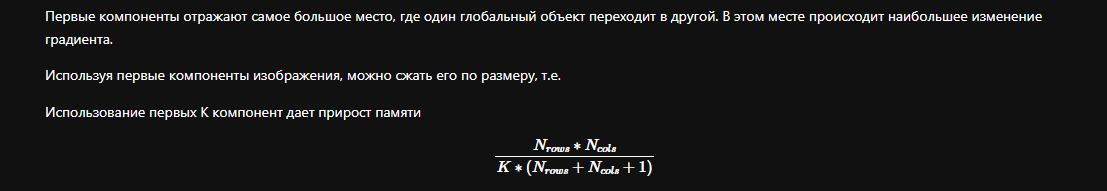